<center><h1>Last_First_HW6</h1></center>

Name: Jason Wang
<br>
Github Username: jasonwangg1321 
<br>
USC ID: 5363148736

## 1. Tree-Based Methods

Import packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

### (a) Download the APS Failure data

In [2]:
training = pd.read_csv('aps_failure_training_set.csv', skiprows=20)
test = pd.read_csv('aps_failure_test_set.csv', skiprows= 20)

training.replace('na', np.nan, inplace= True)
test.replace('na', np.nan, inplace= True)
display(test.head())
display(training.head())

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,NaN,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,NaN,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### (b) Data Preparation

#### (i) Research what types of techniques are usually used

will be imputing data points to missing values.

In [3]:
impute = SimpleImputer(strategy= 'median')

x_training = training.iloc[0:,1:]
x_training_df = impute.fit_transform(x_training)
x_training_df = pd.DataFrame(x_training_df, columns= x_training.columns)
y_training_df = training.iloc[0:,0:1]

full_training_df = pd.concat([y_training_df, x_training_df], axis = 1)
full_training_df



,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002.0,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286.0,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112.0,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292.0,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [4]:
x_test = test.iloc[0:,1:]
x_test_df = impute.fit_transform(x_test)
x_test_df = pd.DataFrame(x_test_df, columns= x_test.columns)
y_test_df = test.iloc[0:,0:1]

full_test_df = pd.concat([y_test_df, x_test_df], axis = 1)
full_test_df


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60.0,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82.0,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002.0,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816.0,0.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814.0,0.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852.0,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18.0,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636.0,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110.0,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


#### (ii) Calculate the coefficient of variation

In [5]:
stats = x_training_df.describe()
sample_mean = stats.loc['mean']
sample_sd = stats.loc['std']

cv = sample_sd/sample_mean
display(cv)

aa_000      2.450938
ab_000     10.383494
ac_000      2.310241
ad_000    244.322816
ae_000     24.200137
             ...    
ee_007      5.012754
ee_008      3.259079
ee_009      5.691612
ef_000     49.366659
eg_000     42.481747
Length: 170, dtype: float64

#### (iii) Plot a correlation matrix

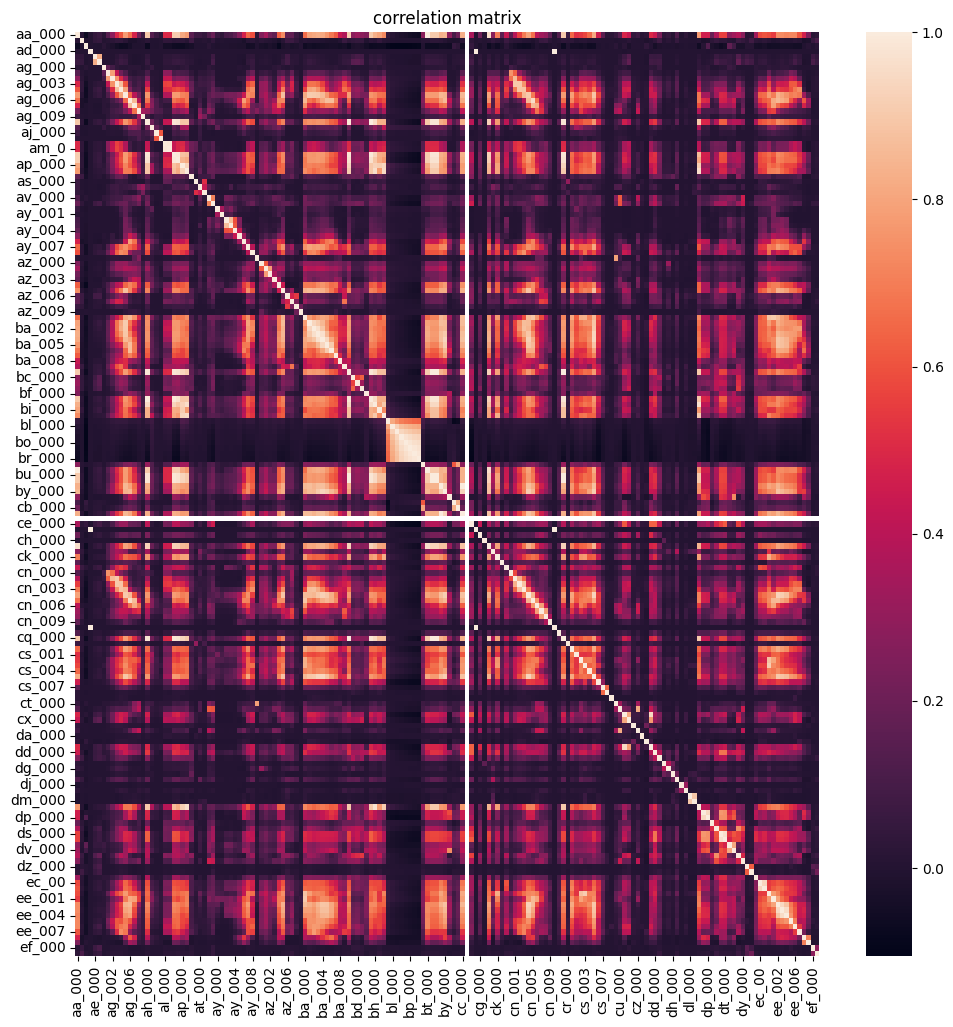

In [6]:
plt.figure(figsize=(12,12))
plt.title('correlation matrix')
corr = x_training_df.corr()
sns.heatmap(corr)
plt.show()

#### (iv) Make scatter plots and box plots

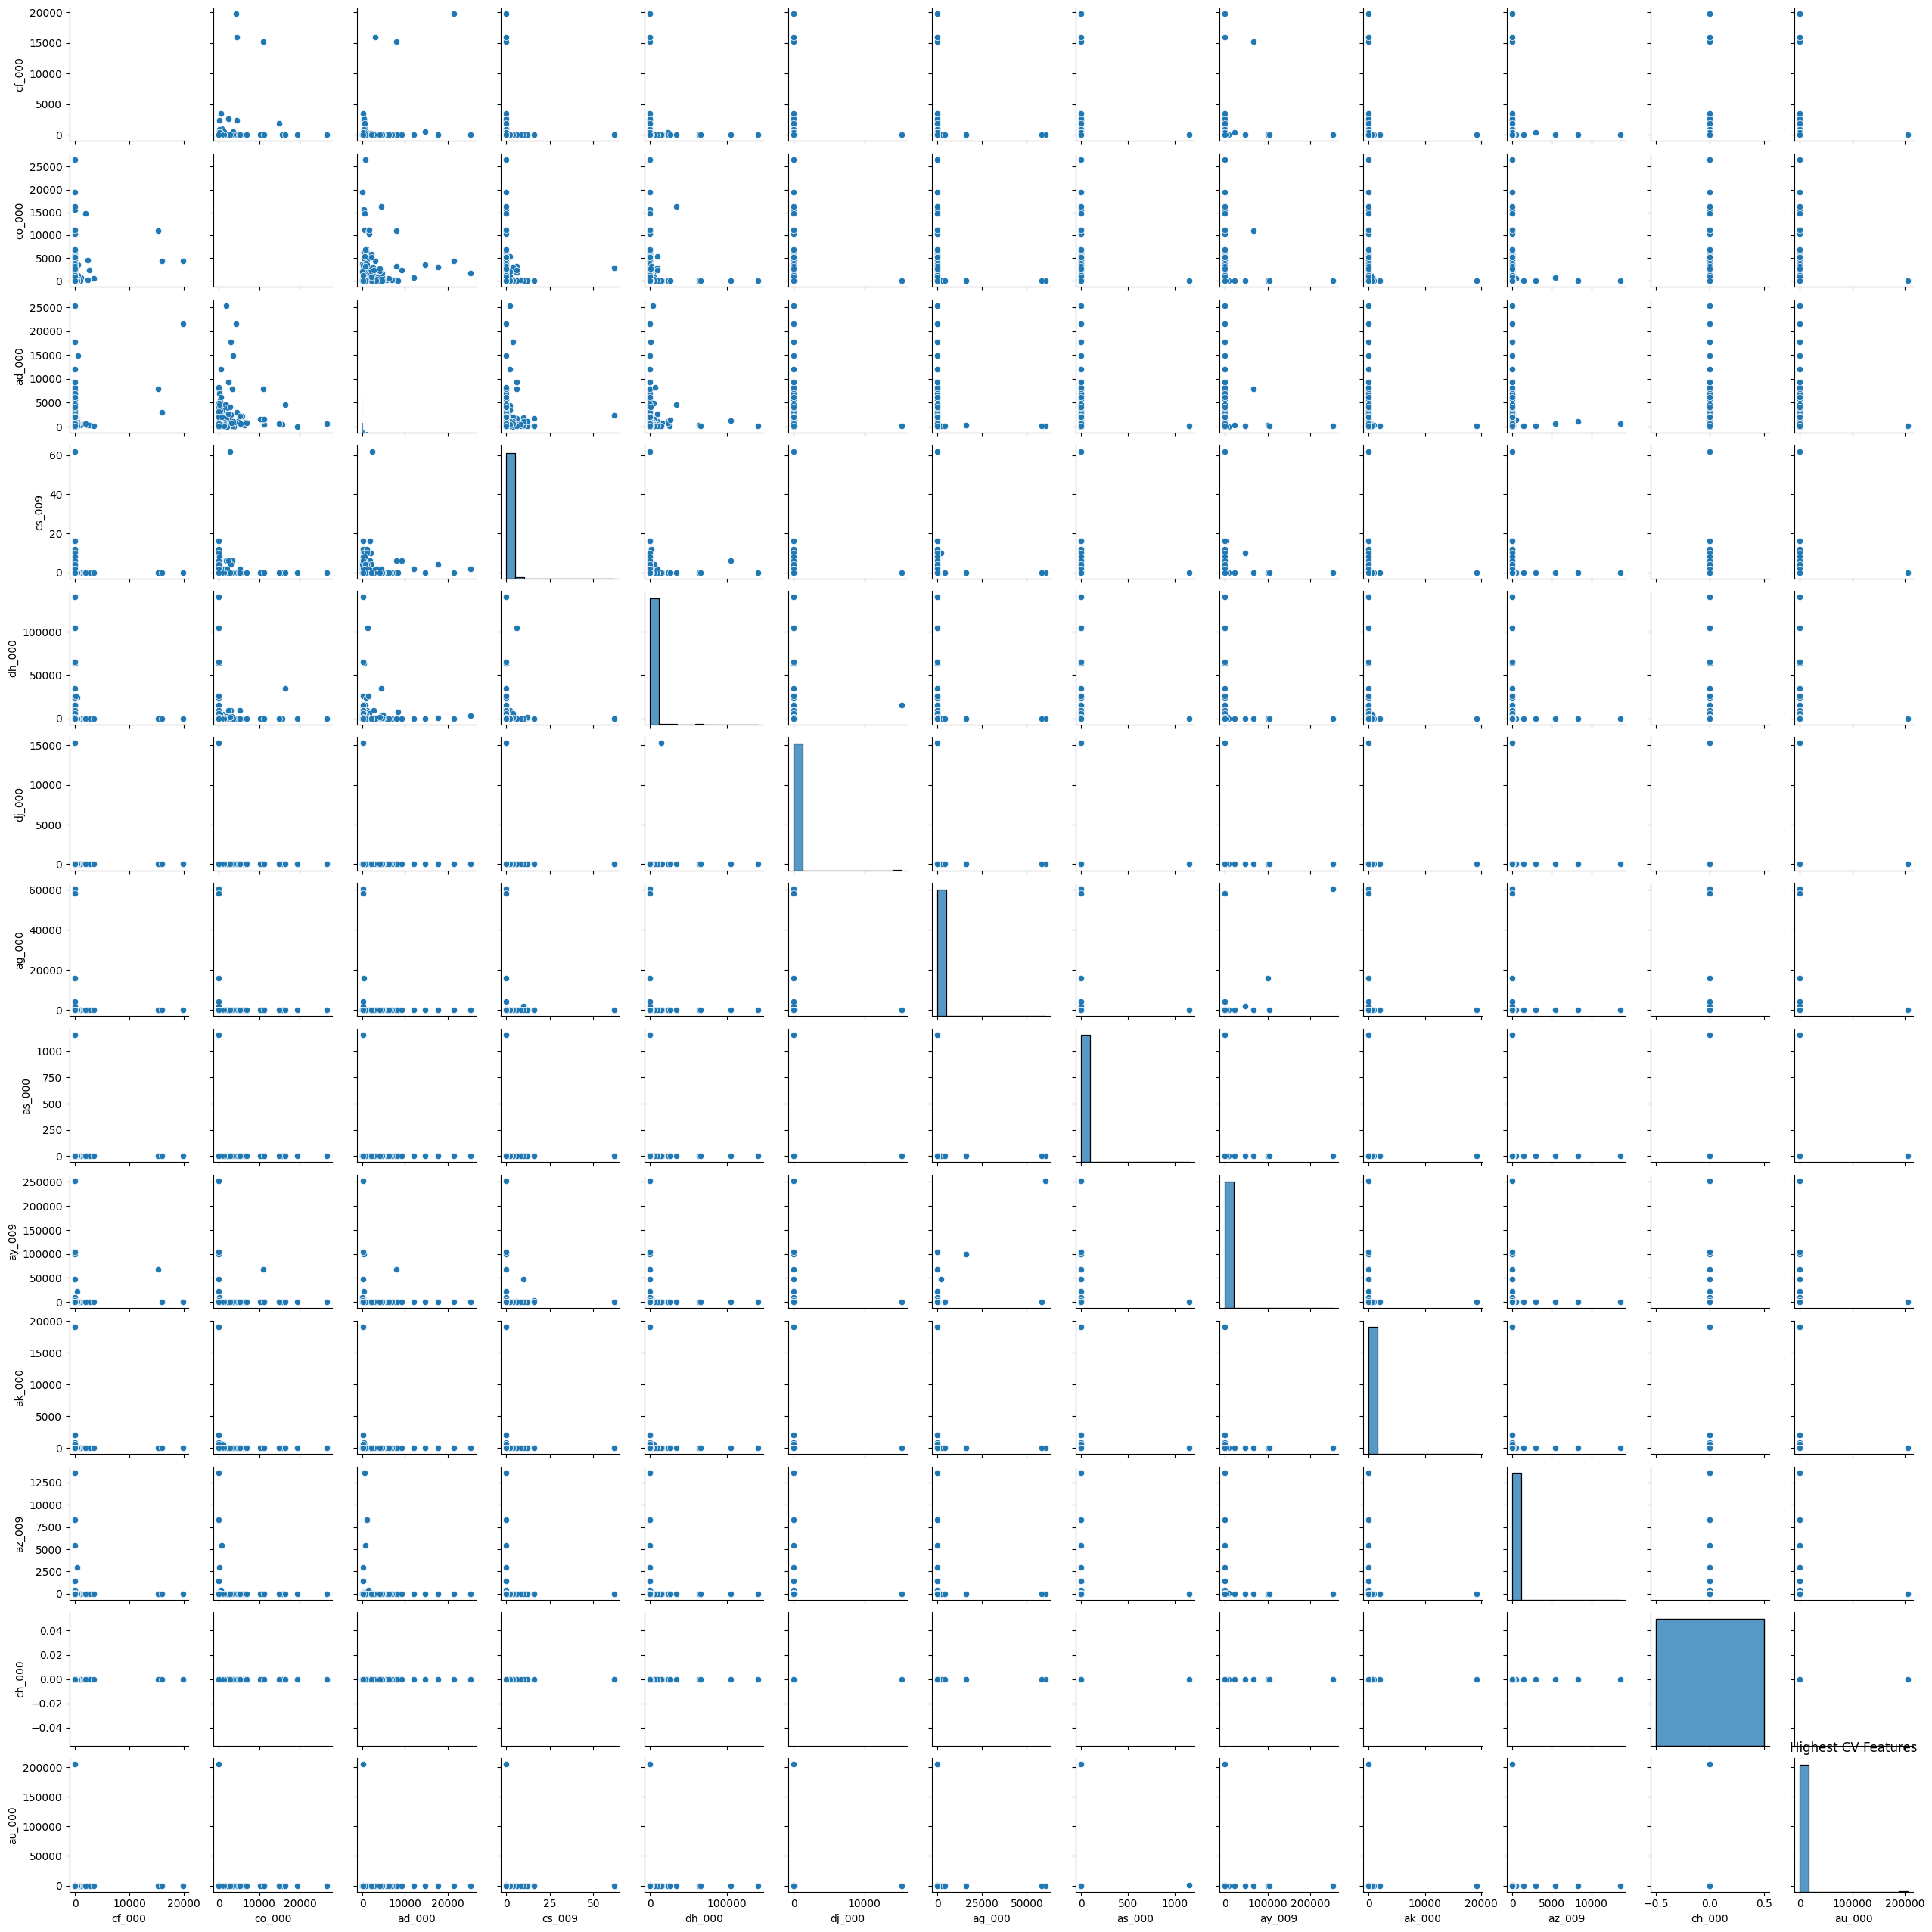

In [7]:
cv_df = pd.DataFrame(cv, columns= ['CV'])
highest_val = cv_df['CV'].nlargest(math.floor(np.sqrt(170)))
# display(highest_val)
wanted_features = ['cf_000', 'co_000', 'ad_000', 'cs_009', 'dh_000', 'dj_000', 'ag_000', 'as_000', 'ay_009', 'ak_000', 'az_009', 'ch_000','au_000']
wanted_features_df = x_training_df[wanted_features]
wanted_features_df = wanted_features_df.apply(pd.to_numeric, downcast = 'float')
# display(wanted_features_df)

#sampled to 2000 because running more was taking a super long time (over 20 mins) and was crashing my kernel
wanted_features_df = wanted_features_df.sample(n = 2000, random_state= 42)
sns.pairplot(wanted_features_df, height= 2, diag_kind= "hist")
plt.title('Highest CV Features')
plt.show()

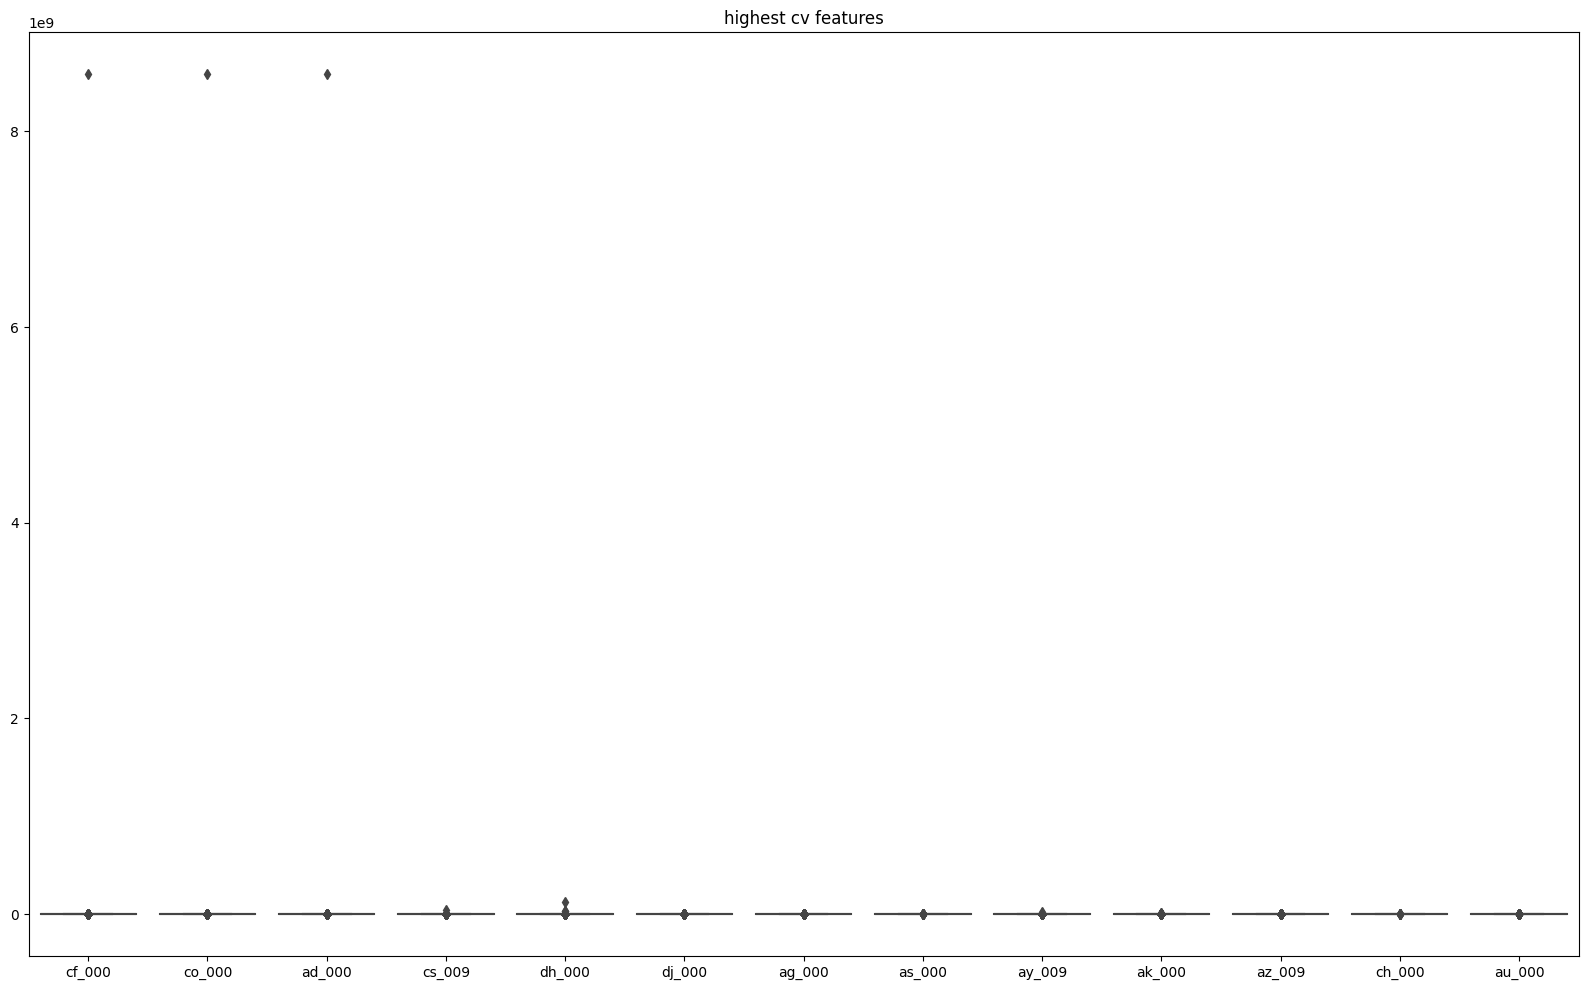

In [38]:
plt.figure(figsize=(20,12))
sns.boxplot(x_training_df[wanted_features])
plt.title('highest cv features')
plt.show()

Due to the outliers in the dataset, the boxplots don't show much about the data. If we were to remove the outliers, the boxplots would be more normal. This is also seen from the scatter plot. Most points are quite scattered around.

#### (v) Is this data set imbalanced?

In [9]:
# display(full_training_df)
full_training_df['class'].value_counts()
print('yes the dataset is very imbalanced looking at the # of neg compared to pos')


yes the dataset is very imbalanced looking at the # of neg compared to pos


### (c) Train a random forest

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf = RandomForestClassifier(oob_score= True)
clf.fit(x_training_df, y_training_df.values.ravel())




RandomForestClassifier(oob_score=True)

In [11]:
y_training_pred = clf.predict(x_training_df)
cm_training = confusion_matrix(y_training_df,y_training_pred)
display(cm_training)

array([[59000,     0],
       [    0,  1000]], dtype=int64)

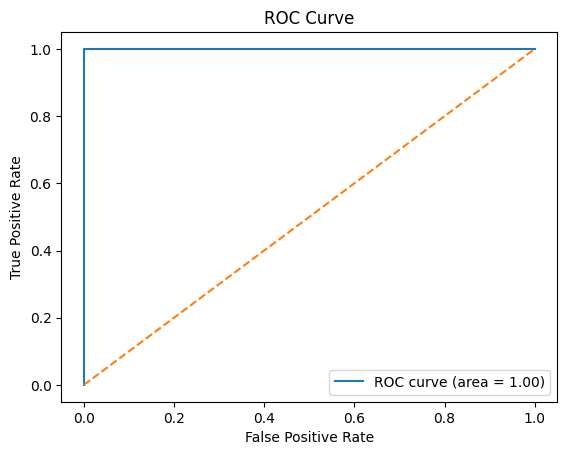

In [12]:
label_encoder = LabelEncoder()
y_training_encoded = label_encoder.fit_transform(y_training_df.values.ravel())
y_training_pred_encoded = label_encoder.fit_transform(y_training_pred)

fpr, tpr, thresholds = roc_curve(y_training_encoded,y_training_pred_encoded)
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [13]:
acc = accuracy_score(y_training_encoded,y_training_pred_encoded)
print(f'Accuracy Score: {acc}')
print(f'Missclassification = {1-acc}')


Accuracy Score: 1.0
Missclassification = 0.0


In [14]:
y_test_pred = clf.predict(x_test_df)
cf = confusion_matrix(y_test_df,y_test_pred)
display(cf)


array([[15608,    17],
       [  106,   269]], dtype=int64)

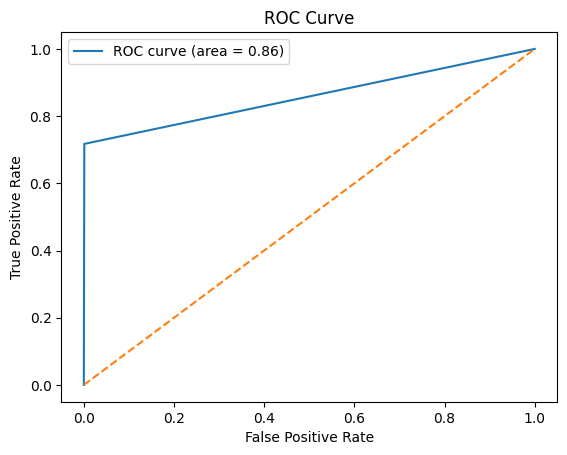

In [15]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test_df.values.ravel())
y_test_pred_encoded = label_encoder.fit_transform(y_test_pred)

fpr, tpr, __ = roc_curve(y_test_encoded,y_test_pred_encoded)
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [16]:
acc = accuracy_score(y_test_encoded,y_test_pred_encoded)
oob_score = clf.oob_score_
print(f'Accuracy Score: {acc}')
print(f'Missclassification = {1-acc}')
print(f'oob error = {1-oob_score}')

print(f'oob error is lower than test misclassification error')

Accuracy Score: 0.9923125
Missclassification = 0.007687499999999958
oob error = 0.0059833333333333405
oob error is lower than test misclassification error


### (d) Research class imbalance in random forest

In [17]:
# https://www.geeksforgeeks.org/bagging-and-random-forest-for-imbalanced-classification/
# we can adjust weights for each class to handle for class imbalance

clf_cw = RandomForestClassifier(class_weight= 'balanced', oob_score= True)
clf_cw.fit(x_training_df, y_training_df.values.ravel())
y_training_pred_cw = clf_cw.predict(x_training_df)



In [18]:
cm_cw = confusion_matrix(y_training_df,y_training_pred_cw)
display(cm_cw)

array([[59000,     0],
       [    0,  1000]], dtype=int64)

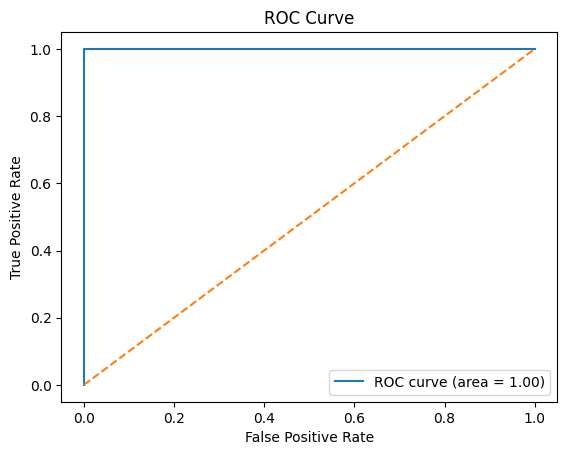

In [19]:
y_training_encoded = label_encoder.fit_transform(y_training_df.values.ravel())
y_training_pred_cw_encoded = label_encoder.fit_transform(y_training_pred_cw)

fpr, tpr, thresholds = roc_curve(y_training_encoded,y_training_pred_cw_encoded)
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [20]:
acc = accuracy_score(y_training_encoded,y_training_pred_cw_encoded)
print(f'Accuracy Score: {acc}')
print(f'Missclassification = {1-acc}')


Accuracy Score: 1.0
Missclassification = 0.0


In [21]:
y_test_pred_cw = clf_cw.predict(x_test_df)
cm_cw = confusion_matrix(y_test_df,y_test_pred_cw)
display(cm_cw)


array([[15609,    16],
       [  164,   211]], dtype=int64)

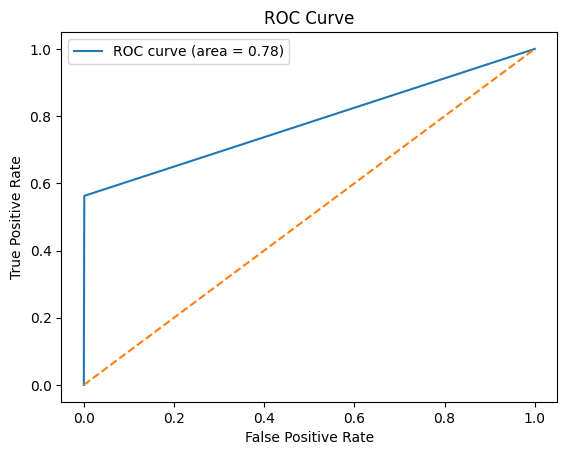

In [22]:
y_test_encoded = label_encoder.fit_transform(y_test_df.values.ravel())
y_test_pred_cw_encoded = label_encoder.fit_transform(y_test_pred_cw)

fpr, tpr, __ = roc_curve(y_test_encoded,y_test_pred_cw_encoded)
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [23]:
acc = accuracy_score(y_test_encoded,y_test_pred_cw_encoded)
oob_score = clf.oob_score_
print(f'Accuracy Score: {acc}')
print(f'Missclassification = {1-acc}')
print(f'oob error = {1-oob_score}')

print(f'oob error is lower than test misclassification error')
print(f'the results in the non balanced class weights actually was more accurate with less error')

Accuracy Score: 0.98875
Missclassification = 0.011249999999999982
oob error = 0.0059833333333333405
oob error is lower than test misclassification error
the results in the non balanced class weights actually was more accurate with less error


### (e) XGBoost and Model Trees

In [24]:
# https://xgboost.readthedocs.io/en/stable/get_started.html
# https://xgboost.readthedocs.io/en/stable/treemethod.html

alpha = [0.01, 0.1, 1, 10, 100]
bst = XGBClassifier(objective= 'binary:logistic')
param_grid = {'alpha': alpha}
grid_search = GridSearchCV(bst, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_training_df, y_training_encoded)
print("best alpha: ", grid_search.best_params_)
print(f"training error: {1-grid_search.best_score_}")





best alpha:  {'alpha': 0.1}
training error: 0.00536666666666652


In [25]:
bst2 = XGBClassifier(reg_lambda = 0.1, objective= 'binary:logistic')
bst2.fit(x_training_df, y_training_encoded)
y_training_pred_xgb = bst2.predict(x_training_df)
cm_xgb = confusion_matrix(y_training_encoded,y_training_pred_xgb)
display(cm_xgb)

array([[59000,     0],
       [    1,   999]], dtype=int64)

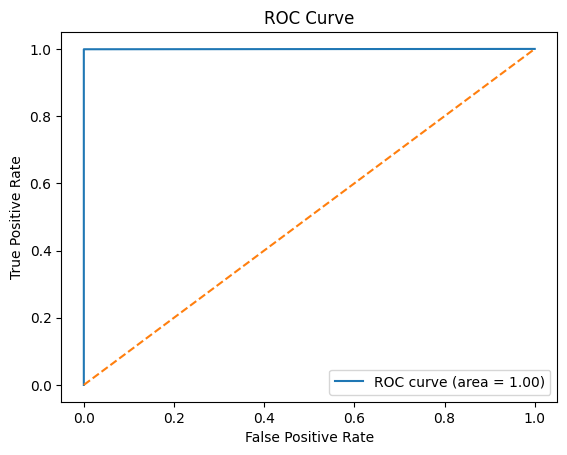

In [26]:
y_training_pred_xgb_encoded = label_encoder.fit_transform(y_training_pred_xgb)

fpr, tpr, thresholds = roc_curve(y_training_encoded,y_training_pred_xgb_encoded)
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [27]:
y_test_pred_xgb = bst2.predict(x_test_df)
print("Test error:", 1-accuracy_score(y_test_encoded, y_test_pred_xgb))




Test error: 0.006062499999999971


In [28]:
cmtest_xgb = confusion_matrix(y_test_encoded,y_test_pred_xgb)
display(cmtest_xgb)

array([[15611,    14],
       [   83,   292]], dtype=int64)

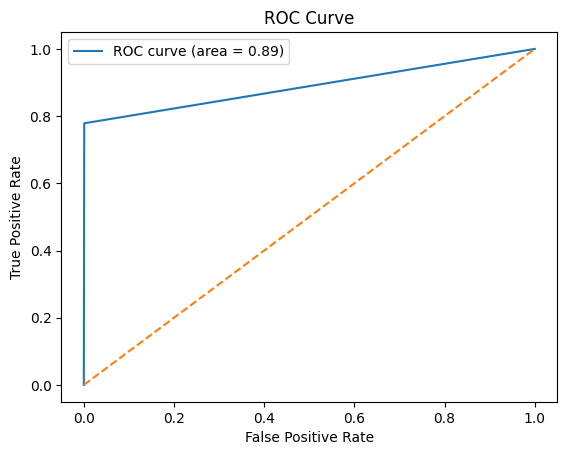

In [29]:
y_test_pred_xgb_encoded = label_encoder.fit_transform(y_test_pred_xgb)

fpr, tpr, thresholds = roc_curve(y_test_encoded,y_test_pred_xgb_encoded)
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### (f) Use SMOTE to pre-process your data

In [30]:
smote = SMOTE(sampling_strategy='auto',random_state=60)
x_training_resampled, y_training_resampled = smote.fit_resample(x_training_df,y_training_df)

In [31]:
y_training_smote_encoded = label_encoder.fit_transform(y_training_resampled.values.ravel())

In [32]:
bst = XGBClassifier(objective= 'binary:logistic')
param_grid = {'alpha': alpha}
grid_search = GridSearchCV(bst, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_training_resampled, y_training_smote_encoded)
print("best alpha: ", grid_search.best_params_)
print(f"training error: {1-grid_search.best_score_}")

best alpha:  {'alpha': 0.01}
training error: 0.0022118644067796733


In [33]:
bst_smote = XGBClassifier(reg_lambda = 0.01, objective= 'binary:logistic')
bst_smote.fit(x_training_resampled, y_training_smote_encoded)
y_training_pred_xgb_smote = bst2.predict(x_training_resampled)
cm_xgb_smote = confusion_matrix(y_training_smote_encoded,y_training_pred_xgb_smote)
display(cm_xgb_smote)

array([[59000,     0],
       [ 5622, 53378]], dtype=int64)

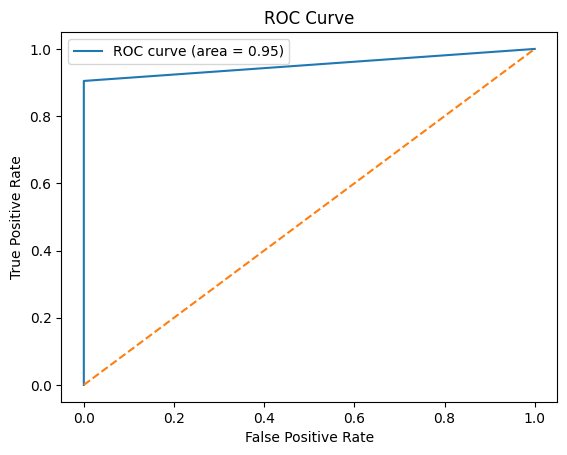

In [34]:
y_training_pred_xgb_smote_encoded = label_encoder.fit_transform(y_training_pred_xgb_smote)

fpr, tpr, thresholds = roc_curve(y_training_smote_encoded,y_training_pred_xgb_smote_encoded)
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [35]:
y_test_pred_xgb_smote = bst_smote.predict(x_test_df)
print("Test error:", 1-accuracy_score(y_test_encoded, y_test_pred_xgb_smote))



Test error: 0.0078125


In [36]:
cmtest_xgb = confusion_matrix(y_test_encoded,y_test_pred_xgb_smote)
display(cmtest_xgb)

array([[15558,    67],
       [   58,   317]], dtype=int64)

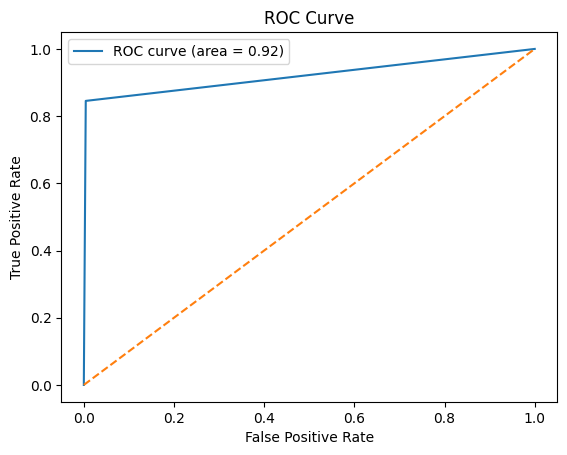

In [37]:
y_test_pred_xgb_smote_encoded = label_encoder.fit_transform(y_test_pred_xgb_smote)

fpr, tpr, thresholds = roc_curve(y_test_encoded,y_test_pred_xgb_smote_encoded)
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

We can see from the ROC curves that the model with SMOTE is more accurate than the original imbalanced dataset.
Boosted Tree was more accurate than the original random forest but SMOTE was most accurate.

## 2. ISLR 6.6.3

a) iv, as s increases the model becomes more and more flexible until it has pretty much fit the whole data set leading to a RSS of 0

b)ii, similar to above the test RSS will decrease until a certain point stated from the variance bias tradeoff.

c) iii, variance will constantly increase as flexibility increases

d) iv, bias will likely decrease since the model is becoming more flexible/variant

e) v, model has nothing to do with the irreducible error

## 3. ISLR 6.6.5

ATTACHED IN SEPARATE PDF AS IT WAS HANDWRITTEN

## 4. ISLR 8.4.5

Majority: Red since majority is Red

Average: Green since average is  P(Red) < 0.5

## 5. ISLR 9.7.3

ATTACHED IN SEPARATE PDF AS IT WAS HANDWRITTEN